In [34]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gb
import plotly.express as ex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xlrd
import warnings
warnings.filterwarnings("ignore")

In [35]:
filepath = '/content/sample_data/Emissioni 10.000 ab.xls'

In [36]:
df = pd.read_excel(filepath)
df1 = df.copy()

In [ ]:
df1.head()

In [ ]:
#estrae header e dati
header = df1.iloc[1]
data_df = df1[3:63]
data_df.columns = header

data_df.reset_index(drop=True, inplace = True)
data_df.head()

In [ ]:
data_df.isna().sum()

In [ ]:
data_df.dropna(inplace = True)
data_df.isna().sum()

<Axes: xlabel='Settore', ylabel='Consumo specifico'>

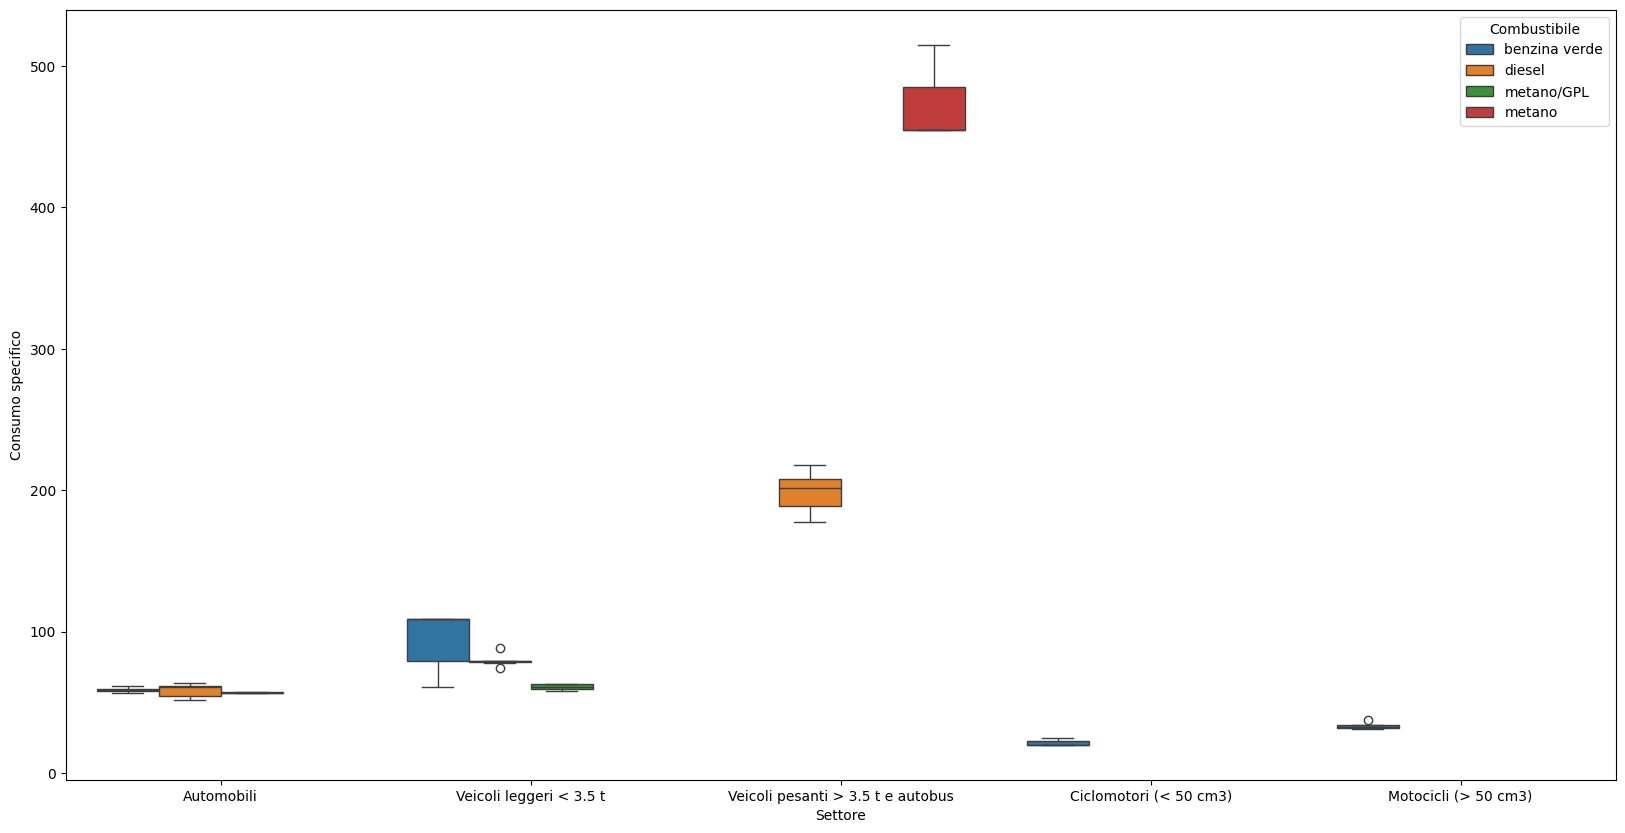

In [50]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Settore', y='Consumo specifico', hue='Combustibile', data=data_df)